### Problem Statement

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.


Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

### Steps to be followed:


1. Load the dataset

2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)

3. Using univariate & bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 

8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [356]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve

In [107]:
# Load the data set
data = pd.read_csv("parkinsons.data")

In [108]:
data.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [386]:
print("There are total 24 attributes")
print("There are 195 etries")
print("'status' is the target column")
print("There seems to be no missing values.")

There are total 24 attributes
There are 195 etries
'status' is the target column
There seems to be no missing values.


In [111]:
print("Column 'name' will not be used in modeling. So, let's drop it")
data = data.drop('name', axis=1)

Column 'name' will not be used in modeling. So, let's drop it


In [112]:
# Checking missing values
data.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [113]:
print("There are no missing values")

There are no missing values


In [114]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [115]:
print("It seems that some columns has skweness. Data is not normalized")
print("Some of the columns like 'MDVP:Flo(Hz)', 'MDVP:Flo(Hz)' seems to have long tails")

It seems that some columns has skweness. Data is not normalized
Some of the columns like 'MDVP:Flo(Hz)', 'MDVP:Flo(Hz)' seems to have long tails


In [116]:
skewness = data.skew()
skewness

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

In [387]:
print("We can see that some columns are highly skewed. It means they have lots of ouliers on the tails")
print("e.g. 'MDVP:Jitter(%)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP' and 'NHR'")

We can see that some columns are highly skewed. It means they have lots of ouliers on the tails
e.g. 'MDVP:Jitter(%)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP' and 'NHR'


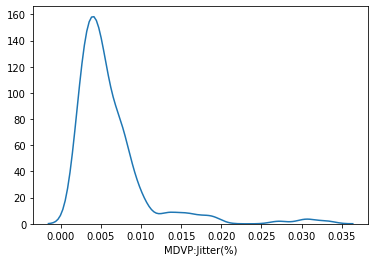

In [118]:
sns.distplot(data['MDVP:Jitter(%)'], hist=False)

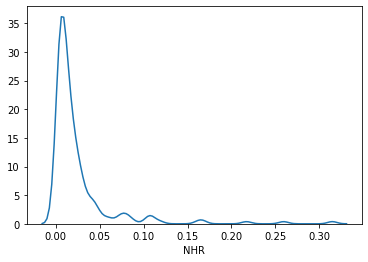

In [119]:
sns.distplot(data['NHR'], hist=False)

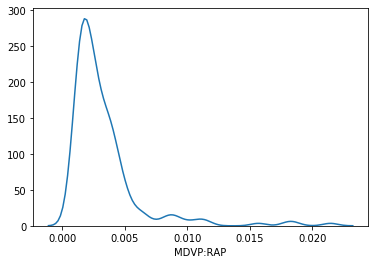

In [120]:
sns.distplot(data['MDVP:RAP'], hist=False)

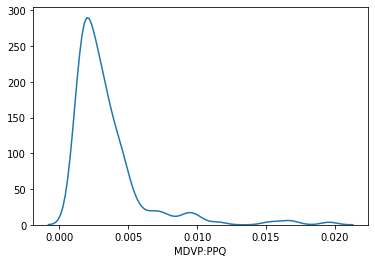

In [121]:
sns.distplot(data['MDVP:PPQ'], hist=False)

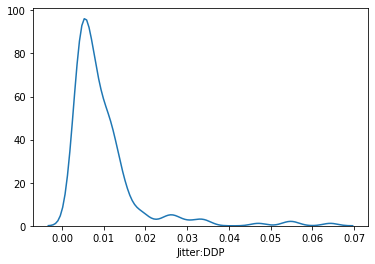

In [122]:
sns.distplot(data['Jitter:DDP'], hist=False)

In [123]:
print("We can see long tails in few columns as shown in above graphs")
print("Data points are already very small. Scaling might not help in reducing the skewness.")
print("It's possible that we have high number of outliers.")

We can see long tails in few columns as shown in above graphs
Data points are already very small. Scaling might not help in reducing the skewness.
It's possible that we have high number of outliers.


In [236]:
#Scaling the Data
scalar = StandardScaler()
X = data.drop('status', axis=1)
X_scaled = pd.DataFrame(scalar.fit_transform(X), columns=X.columns)
y = data['status']

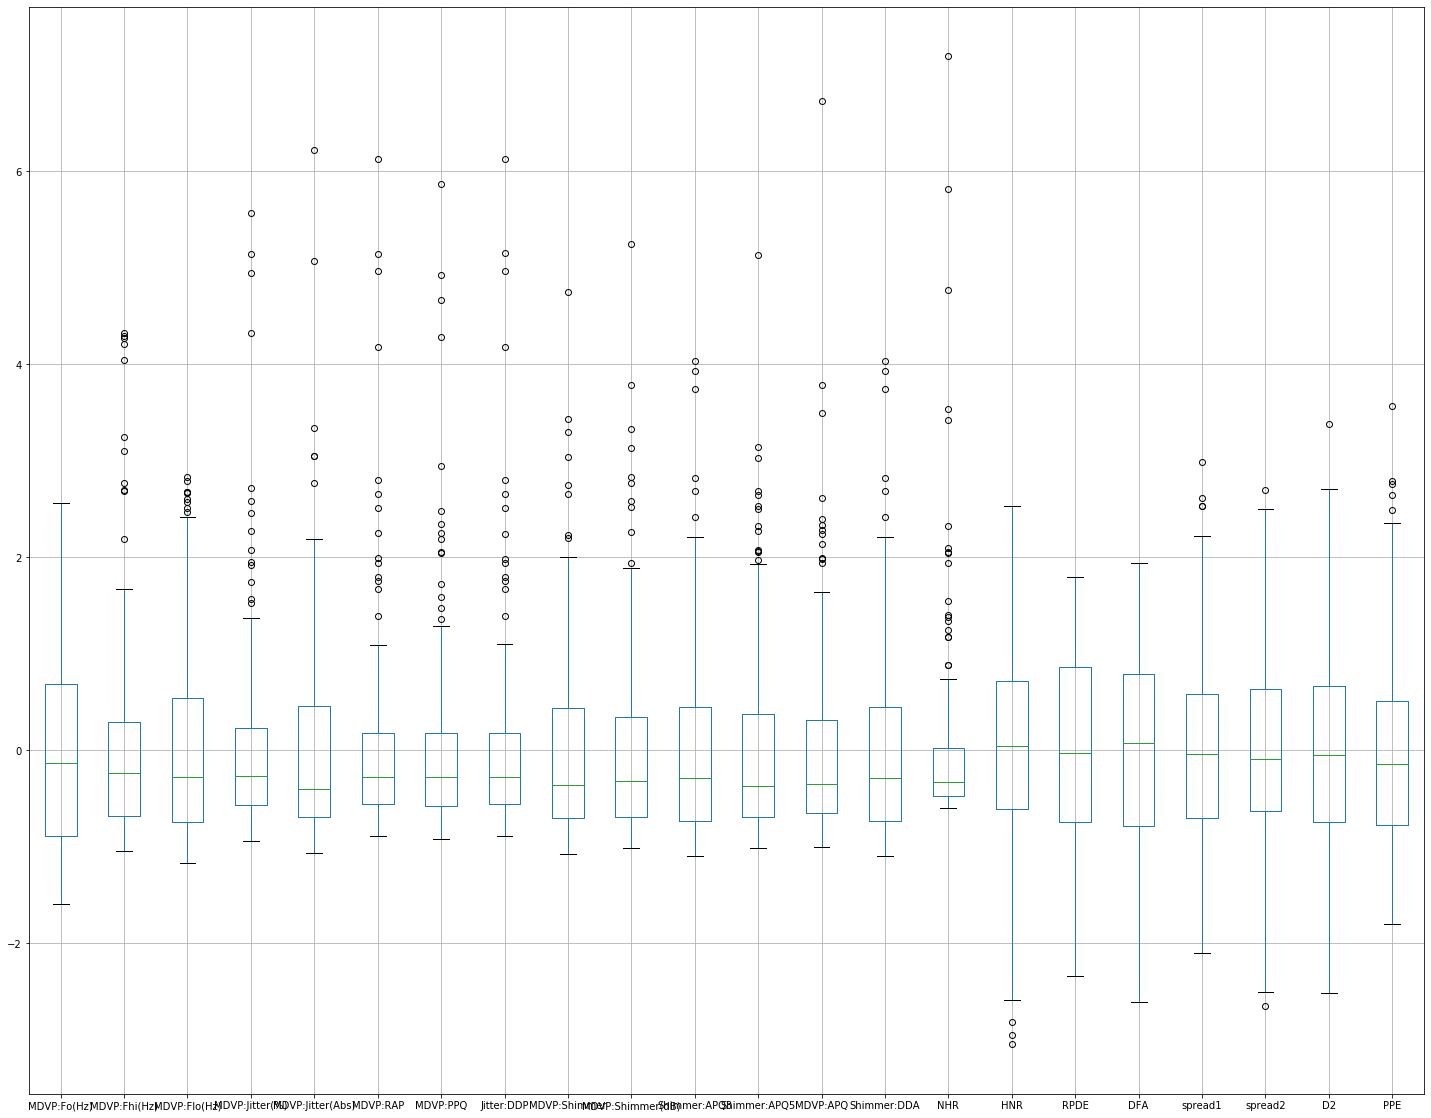

In [238]:
#Checking for Outliers
X_scaled.boxplot(figsize=(25,20))

In [239]:
print("We can see that many columns have large number of Outliers. Let's count them")

We can see that many columns have large number of Outliers. Let's count them


In [240]:
# Initialize the lists
list_count_outlier_above = list()
list_count_outlier_below = list()
list_column = list()

    
#Identifying columns with outlier   
def identifyAndTreatOutliers(column, data):
    Q3 = np.quantile(data, 0.75)
    Q1 = np.quantile(data, 0.25)
    IQR = Q3 -Q1
    above = Q3 + 1.5*IQR
    below = Q1 - 1.5*IQR
    
    count_outlier_above = data.loc[data > above].count()
    count_outlier_below = data.loc[data < below].count()
    
    # If there are no outliers then do nothing
    if ((count_outlier_above == 0) & (count_outlier_below == 0)) :
        return 0
    
    print("Column: '{0}' has outliers".format(column))
    list_count_outlier_above.append(count_outlier_above)
    list_count_outlier_below.append(count_outlier_below)
    list_column.append(column)

In [241]:
for column in X.columns:
    identifyAndTreatOutliers(column, X_scaled[column])

Column: 'MDVP:Fhi(Hz)' has outliers
Column: 'MDVP:Flo(Hz)' has outliers
Column: 'MDVP:Jitter(%)' has outliers
Column: 'MDVP:Jitter(Abs)' has outliers
Column: 'MDVP:RAP' has outliers
Column: 'MDVP:PPQ' has outliers
Column: 'Jitter:DDP' has outliers
Column: 'MDVP:Shimmer' has outliers
Column: 'MDVP:Shimmer(dB)' has outliers
Column: 'Shimmer:APQ3' has outliers
Column: 'Shimmer:APQ5' has outliers
Column: 'MDVP:APQ' has outliers
Column: 'Shimmer:DDA' has outliers
Column: 'NHR' has outliers
Column: 'HNR' has outliers
Column: 'spread1' has outliers
Column: 'spread2' has outliers
Column: 'D2' has outliers
Column: 'PPE' has outliers


In [242]:
# Outlier DataFrame
outlier_df = pd.DataFrame()
outlier_df['Column'] = list_column
outlier_df['Count_outlier_above'] = list_count_outlier_above
outlier_df['Count_outlier_below'] = list_count_outlier_below
outlier_df

,Column,Count_outlier_above,Count_outlier_below
0,MDVP:Fhi(Hz),11,0
1,MDVP:Flo(Hz),9,0
2,MDVP:Jitter(%),14,0
3,MDVP:Jitter(Abs),6,0
4,MDVP:RAP,14,0
5,MDVP:PPQ,15,0
6,Jitter:DDP,14,0
7,MDVP:Shimmer,8,0
8,MDVP:Shimmer(dB),10,0
9,Shimmer:APQ3,6,0


In [252]:
print("There are huge number of outliers and replacing all \
by there median might add bias to the model. So, let's keep it just like that")
print()
print("We gonna use 'entropy' reducing based 'Decsion Tree Classifier'. It will not be impacted by presence of potential Outliers.")

There are huge number of outliers and replacing all by there median might add bias to the model. So, let's keep it just like that

We gonna use 'entropy' reducing based 'Decsion Tree Classifier'. It will not be impacted by presence of potential Outliers.


In [277]:
# Splitting dataset into training and test data in 70:30 ratio
test_size = 0.3
random_state = 7
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=random_state)

In [288]:
def applyModel(criterion='entropy', max_depth=None, min_samples_leaf=1, random_state=7):
    
    # Creating Model
    model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=random_state)
    model.fit(X_train, y_train)
    
    # Train and test score
    train_score = model.score(X_train, y_train)
    print("Train score: {0}".format(train_score))
    test_score = model.score(X_test, y_test)
    print("Test score: {0}".format(test_score))
    
    # Prediction
    y_pred = model.predict(X_test)
    
    # Crosstab to build a confusion matrix
    cross_tab = pd.crosstab(y_test, y_pred, rownames=['ACTUAL'], colnames=['PREDICTED'])
    print()
    print("CROSSTAB")
    print(cross_tab)
    
    # Check count of 0 and 1 original test dataset for the crosstab analysis
    print()
    print("Actual Label Counts:")
    print(y_test.value_counts())

In [290]:
# Creating Model using 'entropy' method with default hyper parameters
applyModel(criterion='entropy', random_state=7)

Train score: 1.0
Test score: 0.8813559322033898

CROSSTAB
PREDICTED  0   1
ACTUAL          
0          9   3
1          4  43

Actual Label Counts:
1    47
0    12
Name: status, dtype: int64


In [292]:
print("We can observe following things from crosstab analysis for the model:")
print("1. It has predicted status '1' correctly 43 times out of total 47")
print("2. It has predicted status '0' correclty 9 times out of total 12")
print("3. This is an overfitted model as it doesn't generalized because training score is 100% but it performed poorly with test data")

We can observe following things from crosstab analysis for the model:
1. It has predicted status '1' correctly 43 times out of total 47
2. It has predicted status '0' correclty 9 times out of total 12
3. This is an overfitted model as it doesn't generalized because training score is 100% but it performed poorly with test data


In [293]:
# Creating Model using 'entropy' method with 'max_depth=3' hyper parameter
applyModel(criterion='entropy', max_depth=3, random_state=7)

Train score: 0.9411764705882353
Test score: 0.9152542372881356

CROSSTAB
PREDICTED  0   1
ACTUAL          
0          9   3
1          2  45

Actual Label Counts:
1    47
0    12
Name: status, dtype: int64


In [309]:
print("We can observe following things from crosstab analysis for the model:")
print("1. Both test and train score is more than 90%")
print("2. It has predicted status '1' correctly 45 times out of total 47 whihc is more than model1")
print("3. It has predicted status '0' correclty 9 times out of total 12")
print("4. Performance Improved because with max_depth parameter we controlled the depth of the decision tree to which it will expand and model is not overfitted")

We can observe following things from crosstab analysis for the model:
1. Both test and train score is more than 90%
2. It has predicted status '1' correctly 45 times out of total 47 whihc is more than model1
3. It has predicted status '0' correclty 9 times out of total 12
4. Performance Improved because with max_depth parameter we controlled the depth of the decision tree to which it will expand and model is not overfitted


In [317]:
# Creating Model using 'entropy' method with 'max_depth=4' hyper parameter
applyModel(criterion='entropy', max_depth=4, random_state=7)

Train score: 0.9852941176470589
Test score: 0.864406779661017

CROSSTAB
PREDICTED  0   1
ACTUAL          
0          9   3
1          5  42

Actual Label Counts:
1    47
0    12
Name: status, dtype: int64


In [388]:
print("We can see that with higher values of max_depth model is again becoming an overfitting model")

We can see that with higher values of max_depth model is again becoming an overfitting model


In [316]:
# Creating Model using 'entropy' method with 'min_samples_leaf' hyper parameter
applyModel(criterion='entropy', min_samples_leaf=2, random_state=7)

Train score: 0.9779411764705882
Test score: 0.8813559322033898

CROSSTAB
PREDICTED   0   1
ACTUAL           
0          10   2
1           5  42

Actual Label Counts:
1    47
0    12
Name: status, dtype: int64


In [308]:
print("We can observe following things from crosstab analysis for the model:")
print("1. Train score is improved but test score is much less. It means the model has not generalized.")
print("2. It has predicted status '1' correctly 42 times out of total 47 whihc is less than previous models")
print("3. It has predicted status '0' correclty 10 times out of total 12 whihc is more than previous models")
print("4. Performance is poor than previous model because we didn't control max_depth hyper parameter and hence model is not generalized.")

We can observe following things from crosstab analysis for the model:
1. Train score is improved but test score is much less. It means the model has not generalized.
2. It has predicted status '1' correctly 42 times out of total 47 whihc is less than previous models
3. It has predicted status '0' correclty 10 times out of total 12 whihc is more than previous models
4. Performance is poor than previous model because we didn't control max_depth hyper parameter and hence model is not generalized.


In [305]:
# Creating Model using 'entropy' method with 'min_samples_leaf=2' and 'max_depth=3' hyper parameter
applyModel(criterion='entropy', max_depth=3, min_samples_leaf=2, random_state=7)

Train score: 0.9411764705882353
Test score: 0.9152542372881356

CROSSTAB
PREDICTED  0   1
ACTUAL          
0          9   3
1          2  45

Actual Label Counts:
1    47
0    12
Name: status, dtype: int64


In [310]:
# Creating Model using 'entropy' method with 'min_samples_leaf=3' and 'max_depth=3' hyper parameter
applyModel(criterion='entropy', max_depth=3, min_samples_leaf=3, random_state=7)

Train score: 0.9411764705882353
Test score: 0.9152542372881356

CROSSTAB
PREDICTED  0   1
ACTUAL          
0          9   3
1          2  45

Actual Label Counts:
1    47
0    12
Name: status, dtype: int64


In [311]:
# Creating Model using 'entropy' method with 'min_samples_leaf=4' and 'max_depth=3' hyper parameter
applyModel(criterion='entropy', max_depth=3, min_samples_leaf=4, random_state=7)

Train score: 0.9411764705882353
Test score: 0.9152542372881356

CROSSTAB
PREDICTED  0   1
ACTUAL          
0          9   3
1          2  45

Actual Label Counts:
1    47
0    12
Name: status, dtype: int64


In [389]:
print("We tried 3 models with different values of 'min_samples_leaf' and 'max_depth=3' hyperparameter but it is not making any difference in the performance of the model")

We tried 3 models with different values of 'min_samples_leaf' and 'max_depth=3' hyperparameter but it is not making any difference in the performance of the model


In [370]:
# Let's Create base RandmForest model first
rf = RandomForestClassifier(max_depth=3)
rf.fit(X_train, y_train)

print("No. of Trees used is 10 which is default")

# Train and test score
train_score = rf.score(X_train, y_train)
print("Train score: {0}".format(train_score))
test_score = rf.score(X_test, y_test)
print("Test score: {0}".format(test_score))
# Precision and Recall along with used thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
print("Threshold: {0}".format(thresholds))
print("Precision: {0}".format(precision))
print("Recall: {0}".format(recall))

# Crosstab to build a confusion matrix
y_pred = rf.predict(X_test)
cross_tab = pd.crosstab(y_test, y_pred, rownames=['ACTUAL'], colnames=['PREDICTED'])
print()
print("CROSSTAB")
print(cross_tab)
    
# Check count of 0 and 1 original test dataset for the crosstab analysis
print()
print("Actual Label Counts:")
print(y_test.value_counts())

No. of Trees used is 10 which is default
Train score: 0.9558823529411765
Test score: 0.8983050847457628
Threshold: [0 1]
Precision: [0.79661017 0.875      1.        ]
Recall: [1.         0.89361702 0.        ]

CROSSTAB
PREDICTED  0   1
ACTUAL          
0          8   4
1          2  45

Actual Label Counts:
1    47
0    12
Name: status, dtype: int64


d:\Profiles\ankGupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [391]:
print("We can observe following things from crosstab analysis for the Base RandomForest Model:")
print("1. We have good Train and test score but low precision and recall comparatively.")
print("2. It has predicted status '1' correctly 45 times out of total 47")
print("3. It has predicted status '0' correclty 8 times out of total 12")
print("Let's improve the score by searching for opitmal no. of trees used with same 'max_depth' and 'min_samples_leaf' than best Descision Tree model created above.")

We can observe following things from crosstab analysis for the Base RandomForest Model:
1. We have good Train and test score but low precision and recall comparatively.
2. It has predicted status '1' correctly 45 times out of total 47
3. It has predicted status '0' correclty 8 times out of total 12
Let's improve the score by searching for opitmal no. of trees used with same 'max_depth' and 'min_samples_leaf' than best Descision Tree model created above.


In [384]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in range(1, 50)]

# Maximum number of levels in tree (Same as optimal decision tree found from above)
max_depth = [3]

# Minimum number of samples required at each leaf node (Same as optimal decision tree found from above)
min_samples_leaf = [1]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'max_depth': [3], 'min_samples_leaf': [1]}


In [379]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_randomcv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_randomcv.fit(X_train, y_train)

d:\Profiles\ankGupta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 49 is smaller than n_iter=100. Running 49 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    2.6s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [380]:
print("Best Parameters: {0}".format(rf_randomcv.best_params_))

Best Parameters: {'n_estimators': 6, 'min_samples_leaf': 1, 'max_depth': 3}


In [381]:
# Creating model with best hyper parameters found
rfc_model = RandomForestClassifier(n_estimators=6, max_depth=3, min_samples_leaf=1, random_state=42)
rfc_model.fit(X_train, y_train)

# Train and test score
train_score = rfc_model.score(X_train, y_train)
print("Train score: {0}".format(train_score))
test_score = rfc_model.score(X_test, y_test)
print("Test score: {0}".format(test_score))

# Precision and Recall
y_pred = rfc_model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
print("Threshold: {0}".format(thresholds))
print("Precision: {0}".format(precision))
print("Recall: {0}".format(recall))

# Crosstab to build a confusion matrix
cross_tab = pd.crosstab(y_test, y_pred, rownames=['ACTUAL'], colnames=['PREDICTED'])
print()
print("CROSSTAB")
print(cross_tab)
    
# Check count of 0 and 1 original test dataset for the crosstab analysis
print()
print("Actual Label Counts:")
print(y_test.value_counts())

Train score: 0.9338235294117647
Test score: 0.8813559322033898
Threshold: [0 1]
Precision: [0.79661017 0.9        1.        ]
Recall: [1.         0.95744681 0.        ]

CROSSTAB
PREDICTED  0   1
ACTUAL          
0          7   5
1          2  45

Actual Label Counts:
1    47
0    12
Name: status, dtype: int64


In [385]:
print("We can observe following things from crosstab analysis for the model:")
print("1. Train, Test score are little less than the base model.")
print("2. Precision and recall have improved")
print("2. It has predicted status '1' correctly 45 times out of total 47 whihc is more than the base model")
print("3. It has predicted status '0' correclty 7 times out of total 12 whihc is less than the base model")
print("4. Optimal no. of tress which gave the best result is {0}".format(rfc_model.n_estimators))

We can observe following things from crosstab analysis for the model:
1. Train, Test score are little less than the base model.
2. Precision and recall have improved
2. It has predicted status '1' correctly 45 times out of total 47 whihc is more than the base model
3. It has predicted status '0' correclty 7 times out of total 12 whihc is less than the base model
4. Optimal no. of tress which gave the best result is 6
